In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\002763\Downloads\Bases de Dados\bases_kaggle\games_sales\vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
console_genero = pd.crosstab(df.Platform, df.Genre)
console_genero.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


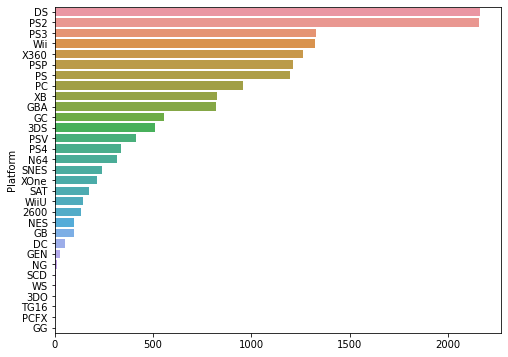

In [7]:
console_genero_Total = console_genero.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y = console_genero_Total.index, x = console_genero_Total.values, orient = 'h')
plt.ylabel = "Console"
plt.xlabel = "QTD Jogos"
plt.show()

C:\Users\002763\AppData\Local\Temp\ipykernel_7696\2528288712.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pop_console_final = pop_console.append(pd.DataFrame(pop_console.sum(), columns = ['total']).T, ignore_index = False)


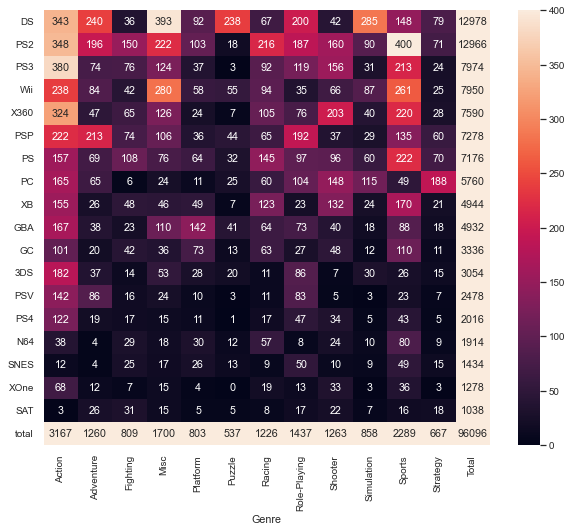

In [17]:
console_genero['Total'] = console_genero.sum(axis = 1)
pop_console = console_genero[console_genero['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = pop_console.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
pop_console_final = pop_console.append(pd.DataFrame(pop_console.sum(), columns = ['total']).T, ignore_index = False)
sns.set(font_scale = 0.9)
plt.figure(figsize=(10,8))
sns.heatmap(pop_console_final, vmin = mini, vmax = maxi, annot = True, fmt = "d")
plt.xticks(rotation = 90)
plt.show()

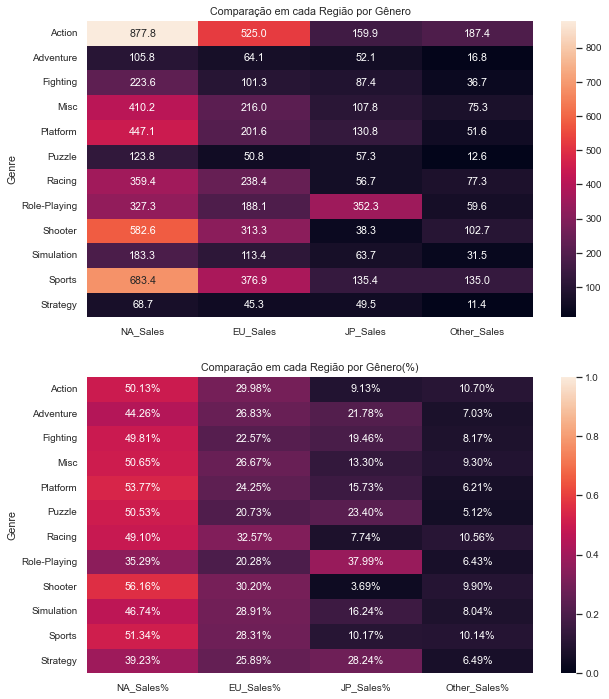

In [18]:
genero_grupo = df.groupby(['Genre']).sum().loc[:,'NA_Sales':'Global_Sales']
genero_grupo['NA_Sales%'] = genero_grupo['NA_Sales']/genero_grupo['Global_Sales']
genero_grupo['EU_Sales%'] = genero_grupo['EU_Sales']/genero_grupo['Global_Sales']
genero_grupo['JP_Sales%']= genero_grupo['JP_Sales']/genero_grupo['Global_Sales']
genero_grupo['Other_Sales%'] = genero_grupo['Other_Sales']/genero_grupo['Global_Sales']
plt.figure(figsize=(10,12))
sns.set(font_scale = 0.9)
plt.subplot(211)
sns.heatmap(genero_grupo.loc[:, 'NA_Sales':'Other_Sales'], annot=True, fmt = '.1f')
plt.title("Comparação em cada Região por Gênero")
plt.subplot(212)
sns.heatmap(genero_grupo.loc[:, 'NA_Sales%':'Other_Sales%'], vmax=1, vmin= 0, annot = True, fmt = '.2%')
plt.title("Comparação em cada Região por Gênero(%)")
plt.show()